#K-Fold Cross Validation for Deep Learning Models using Keras.

Machine Learning models often fails to generalize well on data it has not been trained on. Sometimes, it fails miserably, sometimes it gives somewhat better than miserable performance. To be sure that the model can perform well on unseen data, we use a **re-sampling** technique, called **Cross-Validation.**

We often follow a simple approach of splitting the data into **3 parts,** namely, **Train, Validation and Test sets.** But this technique does not generally work well for cases **when we don’t have a large datasets.** When we have limited data, dividing the dataset into Train and Validation sets may casue **some data points with useful information to be excluded from the training procedure,** and the model fails to learn the data distrubution properly.


So, what different do we do in K-Fold cross validation do?

https://miro.medium.com/v2/resize:fit:750/format:webp/1*PdwlCactbJf8F8C7sP-3gw.png

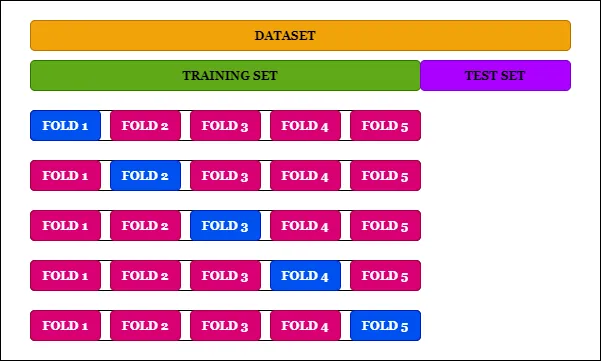

K-Fold CV gives a model with less bias compared to other methods. In K-Fold CV, we have a paprameter ‘k’. This parameter decides how many folds the dataset is going to be divided. Every fold gets chance to appears in the training set (k-1) times, which in turn ensures that every observation in the dataset appears in the dataset, thus enabling the model to learn the underlying data distribution better.


The value of ‘k’ used is generally **between 5 or 10.** The value of ‘k’ should not be too low or too high.

If the value of ‘k’ is **too low** (say k = 2), we will have a **highly biased model.** This case is similar to that of splitting the dataset into training and validation sets, hence the bias will be high and variance low.

If the value of ‘k’ is **large** (say k = n (the number of observations)), then this approach is called **Leave One Out CV (LOOCV).** In this case, bias will be low but the variance will be high and the model will **overfit,** resulting in the model to **fail in generalizing over the test set.**

#NOTE:ANOTHER APPORACH
Another approach is to **shuffle the dataset just once prior to splitting the dataset into k folds**, and **then split,** such that the ratio of the observations in each class remains the same in each fold. Also the **test set does not overlap between consecutive iterations.** This approach is called **Stratified K-Fold CV.** This approach is **useful for imbalanced datasets.**


###A main goal of machine learning is to create models that generalize, meaning that they perform well on data that has not been seen before. To test the generalization power of a model you typically need to split your available data into three separate datasets: **a training set, a validation set, and a testing set.**

### You then train the model on the training data and **evaluate its performance with the validation data.**

### Once the model is sufficiently accurate, you **test it a final time on the testing data.**

### It is best **to test it on a completely new third (testing) dataset** to **avoid overfitting to the validation data.**

### When you are training the model, you are making descisions based on how accurately it classifies (or predicts etc.) the validation data. This inadvertently teaches the model what the validation data looks like and it is possible to overfit and overoptimize it for the validation data even if the model never sees the data in training.

https://cdn-images-1.medium.com/max/1600/1*tBErXYVvTw2jSUYK7thU2A.png

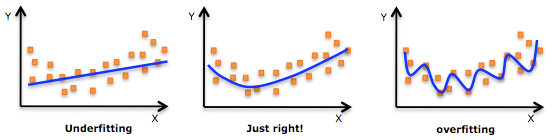

#Underfitting
Underfitting is when the model **does not fit the training data** very well and therefore **cannot generalized to the validation or testing data.** The model has poor predictive abilities and its **accuracy is low.**

#Overfitting
Overfitting is when the model **fits the training** or **validation data too well.** It becomes too specialized for that data and **cannot generalize to new data.** It has **very high accuracy for the training data,** but **performs poorly when evaluated with new data.**

#Splitting the data:
There are a couple of ways to split the data to help avoid these problems:

https://cdn-images-1.medium.com/max/1600/1*4G__SV580CxFj78o9yUXuQ.png

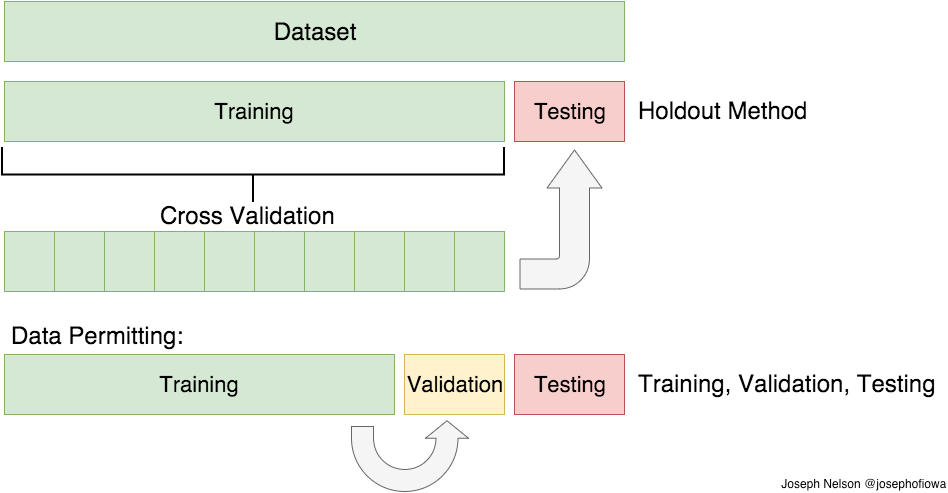

#Hold out validation
Hold out validation is simply **splitting the data into multiple groups and 'holding' one or more groups (testing/validation) 'out' from training.** This works ok, but sometime the split is not as random as we would like.

#Hold-out
Hold-out is when you split up your dataset into **a ‘train’ and ‘test’ set.** The training set is what the model is trained on, and the test set is used to see how well that model performs on unseen data. A common split when using the hold-out method is using 80% of data for training and the remaining 20% of the data for testing.

#Cross-validation
Cross-validation or ‘k-fold cross-validation’ is when the dataset is **randomly split up into ‘k’ groups.** One of the groups is used as the **test set** and the rest are used as the **training set.** The model is trained on the training set and scored on the test set. Then the process is repeated until each unique group as been used as the test set.

For example, for 5-fold cross validation, the dataset would be split into 5 groups, and the **model would be trained and tested 5 separate times so each group would get a chance to be the test set.** This can be seen in the graph below.

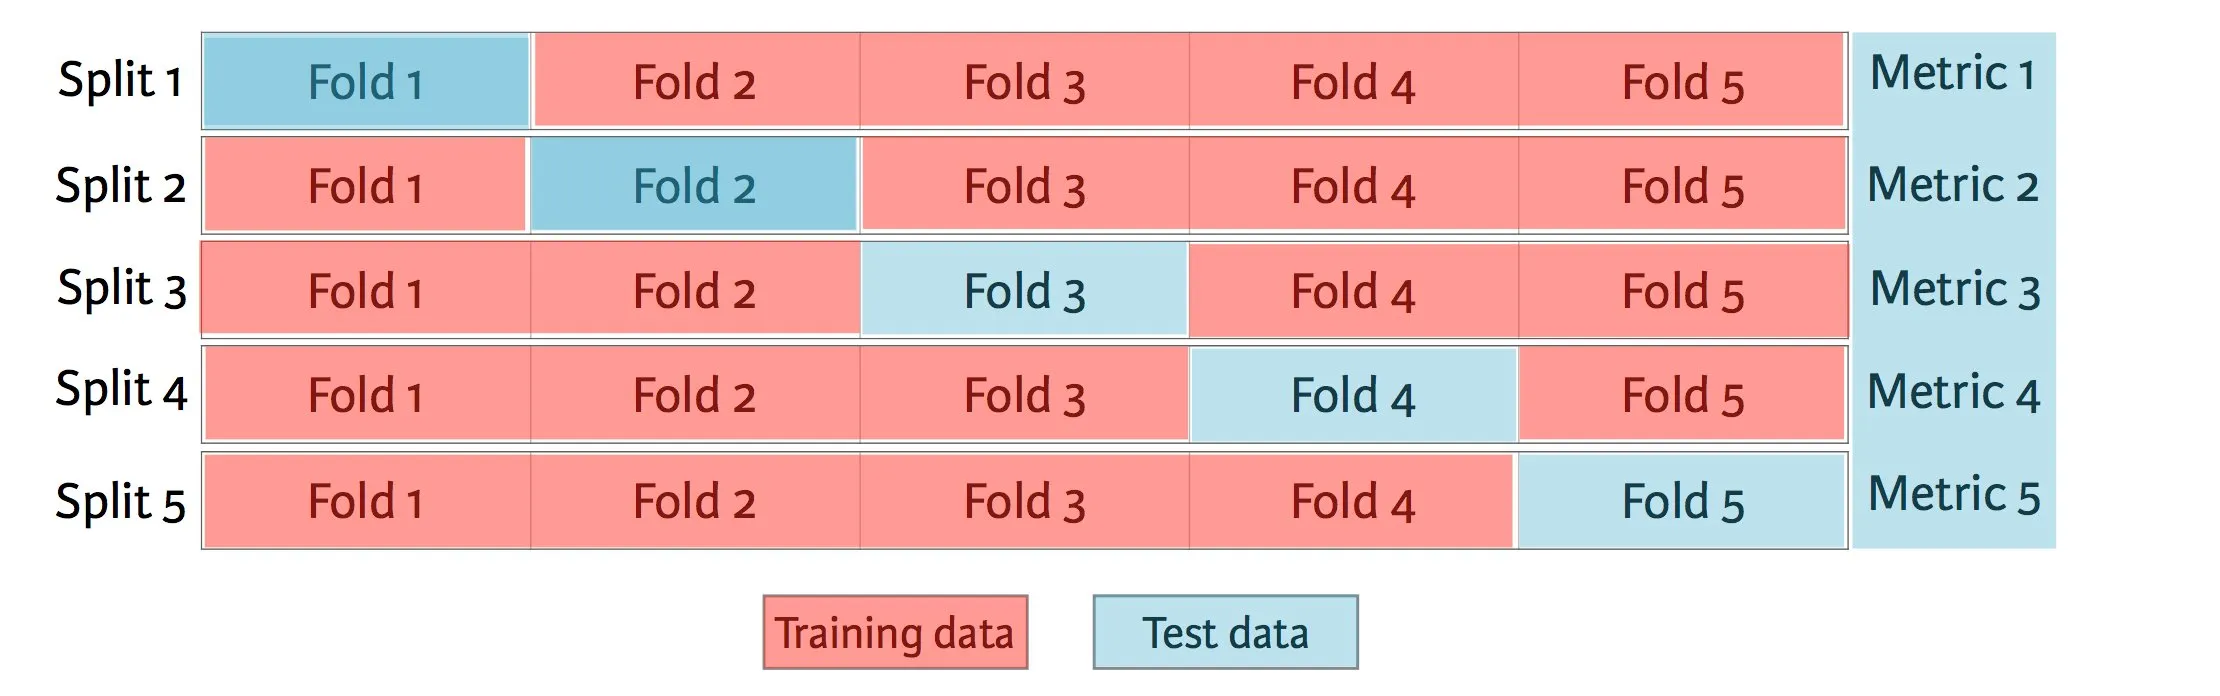

#Hold-out vs. Cross-validation

**Cross-validation** is usually the preferred method because it gives your model the opportunity to train on multiple train-test splits. This gives you a better indication of how well your model will perform on unseen data.

**Hold-out,** on the other hand, is dependent on just one train-test split. That makes the hold-out method score dependent on how the data is split into train and test sets.

The **hold-out method** is good to use when you have a **very large dataset**, you’re on a time crunch, or you are starting to build an initial model in your data science project. Keep in mind that because cross-validation uses multiple train-test splits, it takes more computational power and time to run than using the holdout method.

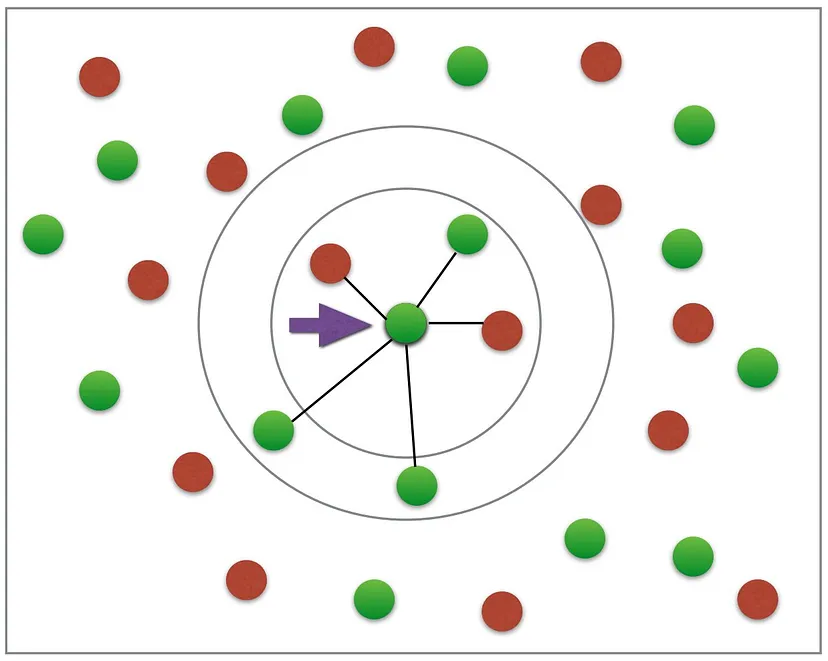

k-Nearest-Neighbors (k-NN) is a supervised machine learning model. Supervised learning is when a model learns from data that is already labeled. A supervised learning model takes in a set of input objects and output values. The model then trains on that data to learn how to map the inputs to the desired output so it can learn to make predictions on unseen data.

k-NN models work by taking a data point and looking at the ‘k’ closest labeled data points. The data point is then assigned the label of the majority of the ‘k’ closest points.

For example, if k = 5, and 3 of points are ‘green’ and 2 are ‘red’, then the data point in question would be labeled ‘green’, since ‘green’ is the majority.



In [23]:
import pandas as pd
#read in the data using pandas
df = pd.read_csv('/content/diabetes_data.csv')
#check data has been read in properly
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
#check number of rows and columns in dataset
df.shape

(768, 9)

We can see that we have 768 rows of data (potential diabetes patients) and 9 columns (8 input features and 1 target output).

##Split up the dataset into inputs and targets
Now let’s split up our dataset into inputs (X) and our target (y). Our input will be every column except ‘diabetes’ because ‘diabetes’ is what we will be attempting to predict. Therefore, ‘diabetes’ will be our target.

We will use pandas ‘drop’ function to drop the column ‘diabetes’ from our dataframe and store it in the variable ‘X’. This will be our input.

In [26]:
#create a dataframe with all training data except the target column
X = df.drop(columns=['diabetes'])
#check that the target variable has been removed
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [28]:
#We will insert the ‘diabetes’ column of our dataset into our target variable (y).

#separate target values
y = df['diabetes'].values
#view target values
y[0:5]

array([1, 0, 1, 0, 1])

##Split the dataset into train and test data
Now we will split the dataset into into training data and testing data. The training data is the data that the model will learn from. The testing data is the data we will use to see how well the model performs on unseen data.

Scikit-learn has a function we can use called ‘train_test_split’ that makes it easy for us to split our dataset into training and testing data.

In [29]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

‘train_test_split’ takes in 5 parameters. The first two parameters are the input and target data we split up earlier. Next, we will set ‘test_size’ to 0.2. This means that 20% of all the data will be used for testing, which leaves 80% of the data as training data for the model to learn from. Setting ‘random_state’ to 1 ensures that we get the same split each time so we can reproduce our results.

Setting ‘stratify’ to y makes our training split represent the proportion of each value in the y variable. For example, in our dataset, if 25% of patients have diabetes and 75% don’t have diabetes, setting ‘stratify’ to y will ensure that the random split has 25% of patients with diabetes and 75% of patients without diabetes.

In [30]:
#Building and training the model


from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

##First, we will create a new k-NN classifier and set ‘n_neighbors’ to 3. To recap, this means that if at least 2 out of the 3 nearest points to an new data point are patients without diabetes, then the new data point will be labeled as ‘no diabetes’, and vice versa. In other words, a new data point is labeled with by majority from the 3 nearest points.

We have set ‘n_neighbors’ to 3 as a starting point. We will go into more detail below on how to better select a value for ‘n_neighbors’ so that the model can improve its performance.

Next, we need to train the model. In order to train our new model, we will use the ‘fit’ function and pass in our training data as parameters to fit our model to the training data.

Testing the model
Once the model is trained, we can use the ‘predict’ function on our model to make predictions on our test data. As seen when inspecting ‘y’ earlier, 0 indicates that the patient does not have diabetes and 1 indicates that the patient does have diabetes. To save space, we will only show print the first 5 predictions of our test set.

In [31]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([0, 0, 0, 0, 1])

We can see that the model predicted ‘no diabetes’ for the first 4 patients in the test set and ‘has diabetes’ for the 5th patient.

Now let’s see how our accurate our model is on the full test set. To do this, we will use the ‘score’ function and pass in our test input and target data to see how well our model predictions match up to the actual results.

In [32]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.6688311688311688

Our model has an accuracy of approximately 66.88%. It’s a good start, but we will see how we can increase model performance below.

Congrats! You have now built an amazing k-NN model!

#k-Fold Cross-Validation
Cross-validation is when the dataset is randomly split up into ‘k’ groups. One of the groups is used as the test set and the rest are used as the training set. The model is trained on the training set and scored on the test set. Then the process is repeated until each unique group as been used as the test set.

For example, for 5-fold cross validation, the dataset would be split into 5 groups, and the model would be trained and tested 5 separate times so each group would get a chance to be the test set.

https://miro.medium.com/v2/resize:fit:828/format:webp/1*NyvaFiG_jXcGgOaouumYJQ.jpeg
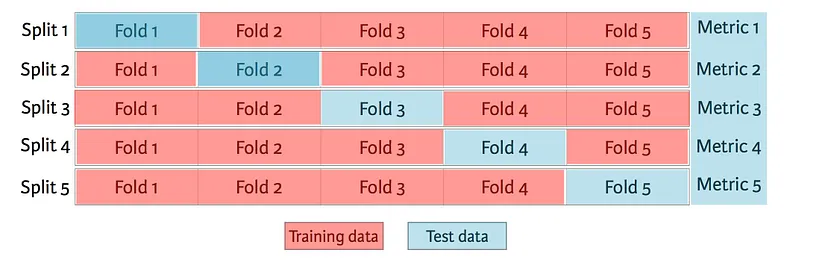

The train-test-split method we used in earlier is called ‘holdout’. Cross-validation is better than using the holdout method because the holdout method score is dependent on how the data is split into train and test sets. Cross-validation gives the model an opportunity to test on multiple splits so we can get a better idea on how the model will perform on unseen data.

In order to train and test our model using cross-validation, we will use the ‘cross_val_score’ function with a cross-validation value of 5. ‘cross_val_score’ takes in our k-NN model and our data as parameters. Then it splits our data into 5 groups and fits and scores our data 5 seperate times, recording the accuracy score in an array each time. We will save the accuracy scores in the ‘cv_scores’ variable.

To find the average of the 5 scores, we will use numpy’s mean function, passing in ‘cv_score’. Numpy is a useful math library in Python.

In [34]:
from sklearn.model_selection import cross_val_score
import numpy as np


#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)


#train model with cv of 5
cv_scores = cross_val_score(knn_cv, X, y, cv=5)


#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.68181818 0.69480519 0.75324675 0.75163399 0.68627451]
cv_scores mean:0.7135557253204311


Using cross-validation, our mean score is about 71.36%. This is a more accurate representation of how our model will perform on unseen data than our earlier testing using the holdout method.

#Hypertuning model parameters using GridSearchCV
When built our initial k-NN model, we set the parameter ‘n_neighbors’ to 3 as a starting point with no real logic behind that choice.

Hypertuning parameters is when you go through a process to find the optimal parameters for your model to improve accuracy. In our case, we will use GridSearchCV to find the optimal value for ‘n_neighbors’.

GridSearchCV works by training our model multiple times on a range of parameters that we specify. That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results.

For our model, we will specify a range of values for ‘n_neighbors’ in order to see which value works best for our model. To do this, we will create a dictionary, setting ‘n_neighbors’ as the key and using numpy to create an array of values from 1 to 24.

Our new model using grid search will take in a new k-NN classifier, our param_grid and a cross-validation value of 5 in order to find the optimal value for ‘n_neighbors’.

In [36]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()


#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}


#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)


#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

After training, we can check which of our values for ‘n_neighbors’ that we tested performed the best. To do this, we will call ‘best_params_’ on our model.

In [37]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 14}

We can see that 14 is the optimal value for ‘n_neighbors’. We can use the ‘best_score_’ function to check the accuracy of our model when ‘n_neighbors’ is 14. ‘best_score_’ outputs the mean accuracy of the scores obtained through cross-validation.

In [38]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7578558696205755

By using grid search to find the optimal parameter for our model, we have improved our model accuracy by over 4%!

#Hold-out Method for Training Machine Learning Models.
The hold-out method for training the machine learning models is a technique that involves splitting the data into different sets: one set for training, and other sets for validation and testing. The hold-out method is used to check how well a machine learning model will perform on the new data.  

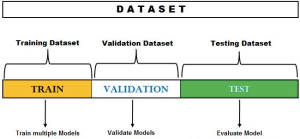

https://i0.wp.com/vitalflux.com/wp-content/uploads/2020/12/Hold-out-method-Training-Validation-Test-Dataset.png?w=651&ssl=1

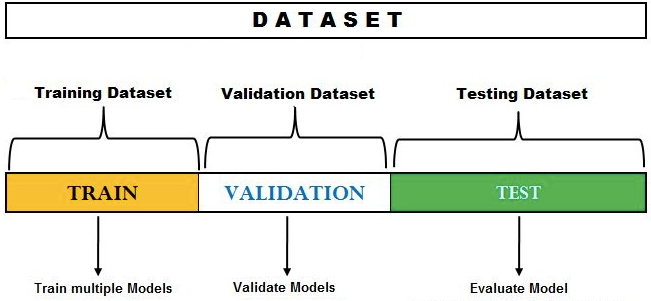


###The following process represents the hold-out method for model selection:

**Split the dataset in three parts** –
  Training dataset, validation dataset and test dataset.

**Train different models using different machine learning algorithms.**
   For example, train the classification model using logistic regression, random forest, XGBoost, etc.

**For the models trained with different algorithms, tune the hyper-parameters and come up with different models.**
   For each of the algorithms mentioned in step 2, change hyperparameters settings and come with multiple models.

**Test the performance of each of these models**
   (belonging to each of the algorithms) on the **validation dataset.**

###Select the most optimal model out of the models tested on the validation dataset.

###The most optimal model will have the most optimal hyperparameters settings for a specific algorithm.

Going by the above example, let’s say the model trained with XGBoost with the most optimal hyperparameters gets selected.

**Test the performance** of the **most optimal model** on the **test dataset.**

#Note:
The three different splits of the original dataset. The process of training, tuning, and evaluation is repeated multiple times, and the most optimal model is selected. The final model is evaluated on the test dataset.

#Hold out method for model selection

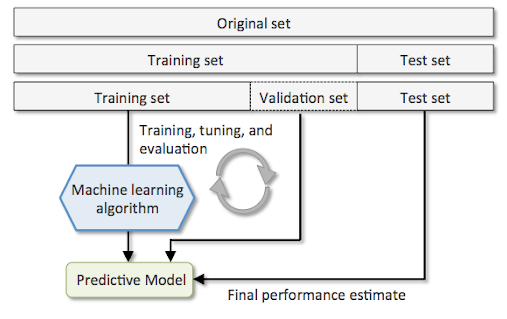

Subsequently, the data is split into training, validation, and test datasets using the train_test_split() function from sklearn.model_selection. The test dataset accounts for 20% of the data, while the training dataset is further divided into training and validation subsets using a 75%/25% split.

In [41]:
from sklearn.metrics import accuracy_score

# Split the data into training, validation, and test datasets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # data splited train and test
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) # train data again splited train & validation.

# Initialize and train the model
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
model = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
model.fit(X_train,y_train)


# Make predictions on the validation dataset
y_pred = model.predict(X_val)

# Evaluate the model performance on the validation dataset
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")

# Make predictions on the test dataset
y_pred_test = model.predict(X_test)

# Evaluate the model performance on the test dataset
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy_test}")

Validation Accuracy: 0.7272727272727273
Test Accuracy: 0.6688311688311688
